In [23]:
#pip3 install tensorflow==2.3.0
#in cmd

One-Hot_Encoding

In [24]:
import re
import numpy as np
import pandas as pd
global alphabet
global maxlen
global N_LANG
N_LANG=10
maxlen=13 #max word lenght 13
alphabet = "abcdefghijklmnopqrstuvwxyzíóéáñúüäßöàèêçôùîûâìòźåãõíłęążśćńøæ" #61 different character found in 10 European different Language
def one_hot_encode(data):
  char_to_int = dict((c, i) for i, c in enumerate(alphabet))
  integer_encoded = [char_to_int[char] for char in data]
  onehot_encoded = []
  for value in integer_encoded:
    letter = np.zeros(len(alphabet))
    letter[value] = 1
    onehot_encoded.append(letter)
  while(len(onehot_encoded)<maxlen):
    letter = np.zeros(len(alphabet))
    onehot_encoded.append(letter)
  return  np.array(onehot_encoded)

def encode_labels(label):
  temp = np.zeros(N_LANG)
  temp[label-1] = 1
  return temp

def process(test_str):
  test_str=test_str.lower()
  test_str = re.sub(r'[^a-zA-Z ]', '', test_str)
  return test_str

After cleaning the data from total 100k words of each language then upload at github,total words of each language

English:-93054 words
, Danish:-96825 words
, Dutch:-96698 words
, French:-95564 words
, German:-97447 words
, Italin:-96847 words
, Polish:-98181 words
, Portuguese:-96429 words
, Spanish:-97058 words
, Swedish:-96870 words

Loading the data and then encoding the words with respect to language.

In [25]:
x=[]
y=[]
df=pd.read_csv('https://github.com/404S-retr0/WebApplication/blob/main/Data_Wordlists.csv?raw=true')
for word,lang in zip(df.WORDS,df.LANGAUAGE_VECTOR):
    if(pd.isna(word)):
      continue
    if(len(word)<=maxlen):
      x.append(one_hot_encode(process(word)))
      y.append(encode_labels(int(lang)))
x=np.array(x)
print(x.shape)
y=np.array(y)
print(y.shape)

(905779, 13, 61)
(905779, 10)


In [32]:
import tensorflow as tf
import kerastuner as kt
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.4)
model = tf.keras.Sequential()
model.add(tf.keras.layers.Flatten())
model.add(tf.keras.layers.Dense(200, input_dim=61*maxlen, activation='sigmoid'))
model.add(tf.keras.layers.Dense(150, activation = 'sigmoid'))
model.add(tf.keras.layers.Dense(100, activation = 'sigmoid'))
model.add(tf.keras.layers.Dense(50, activation = 'sigmoid'))
model.add(tf.keras.layers.Dense(25, activation = 'sigmoid'))
model.add(tf.keras.layers.Dense(N_LANG, activation='softmax'))
model.compile(loss=tf.keras.losses.binary_crossentropy, optimizer=tf.keras.optimizers.Adam(), metrics=['accuracy'])

ImportError: cannot import name 'preprocessing'

In [27]:
filepath = "wmodel.hdf5"
checkpoint = tf.keras.callbacks.ModelCheckpoint(filepath, monitor='val_acc', verbose=1, save_best_only=True,mode='max')
es = tf.keras.callbacks.EarlyStopping(monitor='val_loss', mode='min', verbose=1,patience=2)
callbacks_list = [checkpoint,es]
history=model.fit(x_train,y_train, epochs=50, batch_size=500, validation_data=(x_test,y_test),callbacks=callbacks_list,verbose=1)

Train on 543467 samples, validate on 362312 samples
Epoch 1/50
539500/543467 [============================>.] - ETA: 0s - loss: 0.3134 - acc: 0.9000
Epoch 00001: val_acc improved from -inf to 0.90000, saving model to wmodel.hdf5
543467/543467 [==============================] - 8s 15us/sample - loss: 0.3133 - acc: 0.9000 - val_loss: 0.2970 - val_acc: 0.9000
Epoch 2/50
540000/543467 [============================>.] - ETA: 0s - loss: 0.2800 - acc: 0.9042
Epoch 00002: val_acc improved from 0.90000 to 0.90471, saving model to wmodel.hdf5
543467/543467 [==============================] - 7s 14us/sample - loss: 0.2800 - acc: 0.9042 - val_loss: 0.2738 - val_acc: 0.9047
Epoch 3/50
540000/543467 [============================>.] - ETA: 0s - loss: 0.2713 - acc: 0.9052

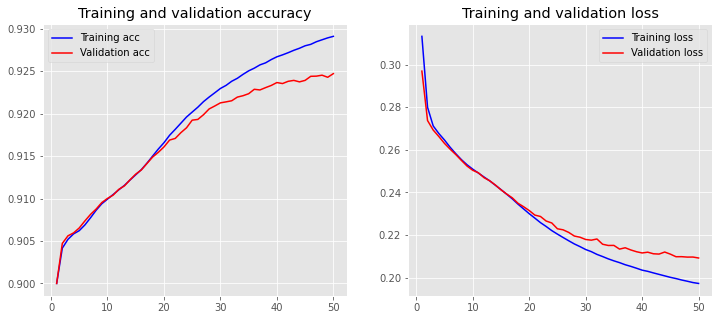

In [28]:
import matplotlib.pyplot as plt
plt.style.use('ggplot')
def plot_history(history):
    acc = history.history['acc']
    val_acc = history.history['val_acc']
    loss = history.history['loss']
    val_loss = history.history['val_loss']
    x = range(1, len(acc) + 1)
    plt.figure(figsize=(12, 5))
    plt.subplot(1, 2, 1)
    plt.plot(x, acc, 'b', label='Training acc')
    plt.plot(x, val_acc, 'r', label='Validation acc')
    plt.title('Training and validation accuracy')
    plt.legend()
    plt.subplot(1, 2, 2)
    plt.plot(x, loss, 'b', label='Training loss')
    plt.plot(x, val_loss, 'r', label='Validation loss')
    plt.title('Training and validation loss')
    plt.legend()

plot_history(history)

In [31]:
def build_hypermodel(hp):
    model = tf.keras.Sequential()
    model.add(tf.keras.layers.Flatten())
    model.add(tf.keras.layers.Dense(hp.Int('units_1', 176, 225, 20), input_dim=61*maxlen, activation='sigmoid'))
    model.add(tf.keras.layers.Dense(hp.Int('units_2', 126, 175, 20), activation = 'sigmoid'))
    model.add(tf.keras.layers.Dense(hp.Int('units_3', 76, 125, 20), activation = 'sigmoid'))
    model.add(tf.keras.layers.Dense(hp.Int('units_4', 26, 75, 20), activation = 'sigmoid'))
    model.add(tf.keras.layers.Dense(hp.Int('units_5', 11, 25, 20), activation = 'sigmoid'))
    model.add(tf.keras.layers.Dense(N_LANG, activation='softmax'))
    model.compile(loss=tf.keras.losses.binary_crossentropy, optimizer=tf.keras.optimizers.Adam(), metrics=['accuracy'])
    return model

ImportError: cannot import name 'preprocessing'

In [30]:
tuner = kt.RandomSearch(hypermodel=build_hypermodel,objective='val_loss',max_trials=25,directory='test_dir',project_name='a')

ImportError: cannot import name 'preprocessing'

In [ ]:
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test=train_test_split(x,y,test_size=0.4)
filepath = "wtuner.hdf5"
checkpoint = tf.keras.callbacks.ModelCheckpoint(filepath, monitor='val_acc', verbose=1, save_best_only=True,save_weights_only=True,mode='max')
es = tf.keras.callbacks.EarlyStopping(monitor='val_loss', mode='min', verbose=1,patience=2)
callbacks_list = [checkpoint,es]
history=tuner.search(X_train,Y_train, epochs=50, batch_size=500, validation_data=(X_test,Y_test),callbacks=callbacks_list,verbose=1)

In [ ]:
best_hps = tuner.get_best_hyperparameters(num_trials = 1)[0]
print(f"""
The hyperparameter search is complete. 
The optimal number of units in the first densely-connected layer is {best_hps.get('units_1')}. 
The optimal number of units in the second densely-connected layer is {best_hps.get('units_2')}.
The optimal number of units in the third densely-connected layer is {best_hps.get('units_3')}.
The optimal number of units in the fourth densely-connected layer is {best_hps.get('units_4')}.
The optimal number of units in the fifth densely-connected layer is {best_hps.get('units_5')}.
""")

In [ ]:
modelupd = tuner.hypermodel.build(best_hps)

In [ ]:
filepath = "wmodel.hdf5"
checkpoint = tf.keras.callbacks.ModelCheckpoint(filepath, monitor='val_accuracy', verbose=1, save_best_only=True,save_weights_only=True,mode='max')
es = tf.keras.callbacks.EarlyStopping(monitor='val_loss', mode='min', verbose=1,patience=2)
callbacks_list = [checkpoint,es]
history=modelupd.fit(x_train,y_train, epochs=50, batch_size=500, validation_data=(x_test,y_test),callbacks=callbacks_list,verbose=1)

In [ ]:
model.summary()

In [ ]:
import matplotlib.pyplot as plt
plt.style.use('ggplot')
def plot_history(history):
    acc = history.history['accuracy']
    val_acc = history.history['val_acc']
    loss = history.history['loss']
    val_loss = history.history['val_loss']
    x = range(1, len(acc) + 1)
    plt.figure(figsize=(12, 5))
    plt.subplot(1, 2, 1)
    plt.plot(x, acc, 'b', label='Training acc')
    plt.plot(x, val_acc, 'r', label='Validation acc')
    plt.title('Training and validation accuracy')
    plt.legend()
    plt.subplot(1, 2, 2)
    plt.plot(x, loss, 'b', label='Training loss')
    plt.plot(x, val_loss, 'r', label='Validation loss')
    plt.title('Training and validation loss')
    plt.legend()

plot_history(history)

Saving the Model and Input Data(Non-Targeting Data)

In [ ]:
# Save your model
model_json = modelupd.to_json()
with open("modelupd.json", "w") as json_file:
    json_file.write(model_json)
# serialize weights to HDF5
modelupd.save_weights("modelupd.h5")
print("Saved model to disk")

Defining text2list function

In [ ]:
def text2list(text):
  import string
  import re
  test_str=text
  test_str = ''.join([i for i in test_str if not i.isdigit()]) 
  test_str=test_str.lower()
  punc = '''!()-[]{};:'"\,<>./¿?@#$%^&*_~+-=|`'''

  for ele in test_str:
    if ele in punc:
      test_str = test_str.replace(ele, "")  

  test_str_split=re.split('\s+', test_str)
  
  if (test_str_split[0]==''):
    test_str_split.remove('')
  if (test_str_split[len(test_str_split)-1]==''):
    test_str_split.remove('')

  return test_str_split

Loading the Model and defining lang_detect in percentage Distribution

In [ ]:
import pickle
from keras.models import model_from_json
def lang_detect(text):
    global loaded_model
    json_file = open('modelupd.json', 'r')
    loaded_model_json = json_file.read()
    json_file.close()
    loaded_model = model_from_json(loaded_model_json)
    # load weights into new model
    loaded_model.load_weights("modelupd.h5")
    print("Loaded model from disk")
    list_of_word=text2list(text)
    k=[]
    for word in list_of_word:
        k.append(one_hot_encode(process(word)))
        ans=loaded_model.predict(np.array(k))
    print('Predication of language belonging of each unique word from a sentence\n')
    for q in range(len(list_of_word)):
        eng=0
        dan=0
        dut=0
        fre=0
        ger=0
        ita=0
        pol=0
        por=0
        spa=0
        swe=0
        eng+=ans[q][0]
        dan+=ans[q][1]
        dut+=ans[q][2]
        fre+=ans[q][3]
        ger+=ans[q][4]
        ita+=ans[q][5]
        pol+=ans[q][6]
        por+=ans[q][7]
        spa+=ans[q][8]
        swe+=ans[q][9]
        each_word=list_of_word[q]
        print(each_word)
        report = "Percentage Distribution\nEnglish:-{}\nDanish:-{}\nDutch:-{}\nFrench:-{}\nGerman:-{}\nItalian:-{}\nPolish:-{}\nPortuguese:-{}\nSpanish:-{}\nSwedish:-{}\n".format(eng,dan,dut,fre,ger,ita,pol,por,spa,swe)
        print(report)

Running the lang_detect function as trailer

In [ ]:
lang_detect('freshdirect')
lang_detect('hello @amigo , m+y name is 007. wie gehts? ¿necesitas ayuda?')